LSTMs, or Long Short-Term Memory units, are a type of recurrent neural network (RNN) designed to recognize patterns in sequences. Using PyTorch, a popular open-source machine learning library, we can easily implement and train these powerful sequence models.

## Part 1:  Data Preparation for Sequential Predictive Modeling

We will use Fitbit refined dataset: https://www.kaggle.com/datasets/athul3000/fitbit-refined-data for this exercise. For the purposes of demonstartion, Hourlymerged.csv data, which is hourly aggregated data related to physical activities and metrics such as Calories, TotalIntensity, AverageIntensity and Step-Total, would be used. 

## Data Exploration

We start with Summary Statistics. In the context of data analysis, using summary statistics is a foundational step. They allow you to quickly grasp the main features of your data before diving into more detailed analysis or modeling.

## Import packages

In [1]:
from utils_heart import *

In [2]:
file_path = 'Dataset/2022_04_22_hour_heartbeat_merged.csv'
df = load_dataset(file_path)

In [3]:
df.head()

,time,Beats,Id,Intensity,Steps
0,2016-04-12 01,83,2022484408,0.0,0.0
1,2016-04-12 02,78,2022484408,0.0,0.0
2,2016-04-12 03,66,2022484408,0.0,0.0
3,2016-04-12 04,68,2022484408,0.0,0.0
4,2016-04-12 05,68,2022484408,0.0,0.0


In [4]:
df.shape

(6252, 5)

In [5]:
df.describe()

,Beats,Id,Intensity,Steps
count,6252.000000,6.252000e+03,6246.000000,6246.000000
mean,73.845170,5.638328e+09,16.101185,431.416747
std,14.799422,1.864900e+09,25.190960,811.960176
min,46.000000,2.022484e+09,0.000000,0.000000
25%,63.000000,4.558610e+09,0.000000,0.000000
50%,71.000000,5.577150e+09,7.000000,130.000000
75%,81.000000,6.962181e+09,22.000000,542.000000
max,167.000000,8.877689e+09,180.000000,10554.000000


There are 6252 samples, feature Beats has a small deviation, while Intesity and Steps vary a lot.

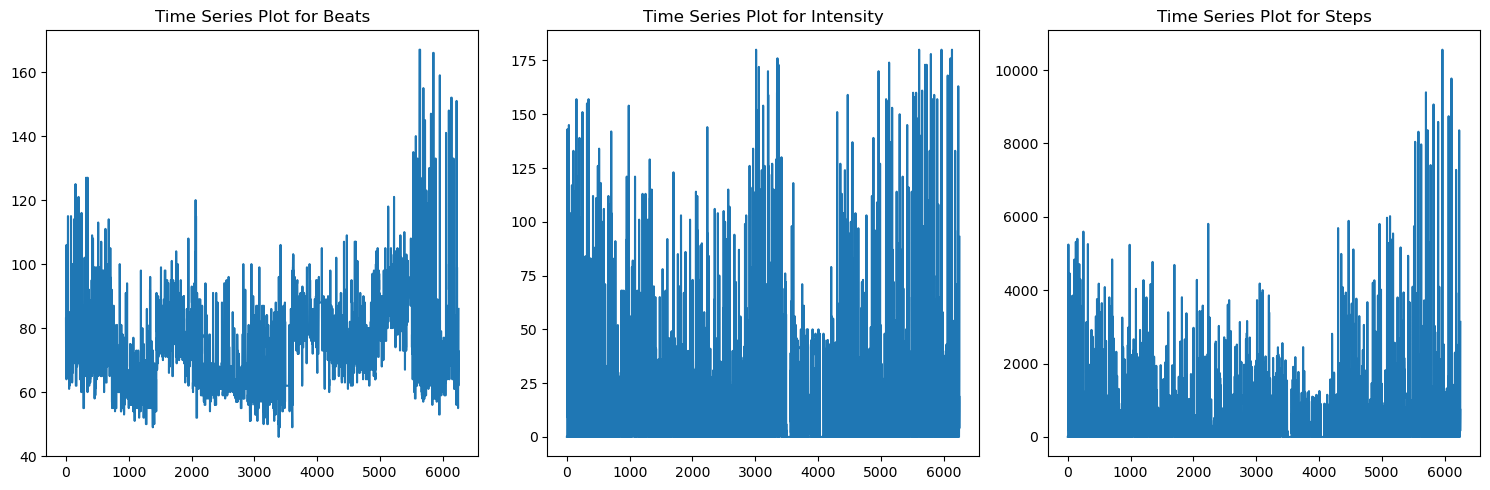

In [6]:
from utils_heart import plot_histograms, plot_time_series_plot

plot_time_series_plot(df)

In [7]:
user_ids = get_user_ids(df)
print(user_ids)

[2022484408 4388161847 4558609924 5553957443 5577150313 6117666160
 6962181067 7007744171 8877689391]


In [8]:
for user in user_ids:
    print(f"User: {user} has {len(get_data_for_user(user, df))} data entries")

User: 2022484408 has 732 data entries
User: 4388161847 has 708 data entries
User: 4558609924 has 732 data entries
User: 5553957443 has 732 data entries
User: 5577150313 has 708 data entries
User: 6117666160 has 588 data entries
User: 6962181067 has 732 data entries
User: 7007744171 has 588 data entries
User: 8877689391 has 732 data entries


In [9]:
data_by_users = {}

for user in user_ids:
    user_data = get_data_for_user(user, df)
    data_by_users[user] = user_data
    
for user in user_ids:
    print(data_by_users[user])

              time  Beats          Id  Intensity   Steps
0    2016-04-12 01     83  2022484408        0.0     0.0
1    2016-04-12 02     78  2022484408        0.0     0.0
2    2016-04-12 03     66  2022484408        0.0     0.0
3    2016-04-12 04     68  2022484408        0.0     0.0
4    2016-04-12 05     68  2022484408        0.0     0.0
..             ...    ...         ...        ...     ...
727  2016-05-12 08     69  2022484408       14.0   418.0
728  2016-05-12 09     89  2022484408       34.0   812.0
729  2016-05-12 10     92  2022484408       83.0  2689.0
730  2016-05-12 11     71  2022484408       21.0   378.0
731  2016-05-12 12     72  2022484408       21.0   507.0

[732 rows x 5 columns]
               time  Beats          Id  Intensity  Steps
732   2016-04-13 01     57  4388161847        0.0    0.0
733   2016-04-13 02     57  4388161847        0.0    0.0
734   2016-04-13 03     55  4388161847        0.0    0.0
735   2016-04-13 04     64  4388161847        0.0    0.0
736   2

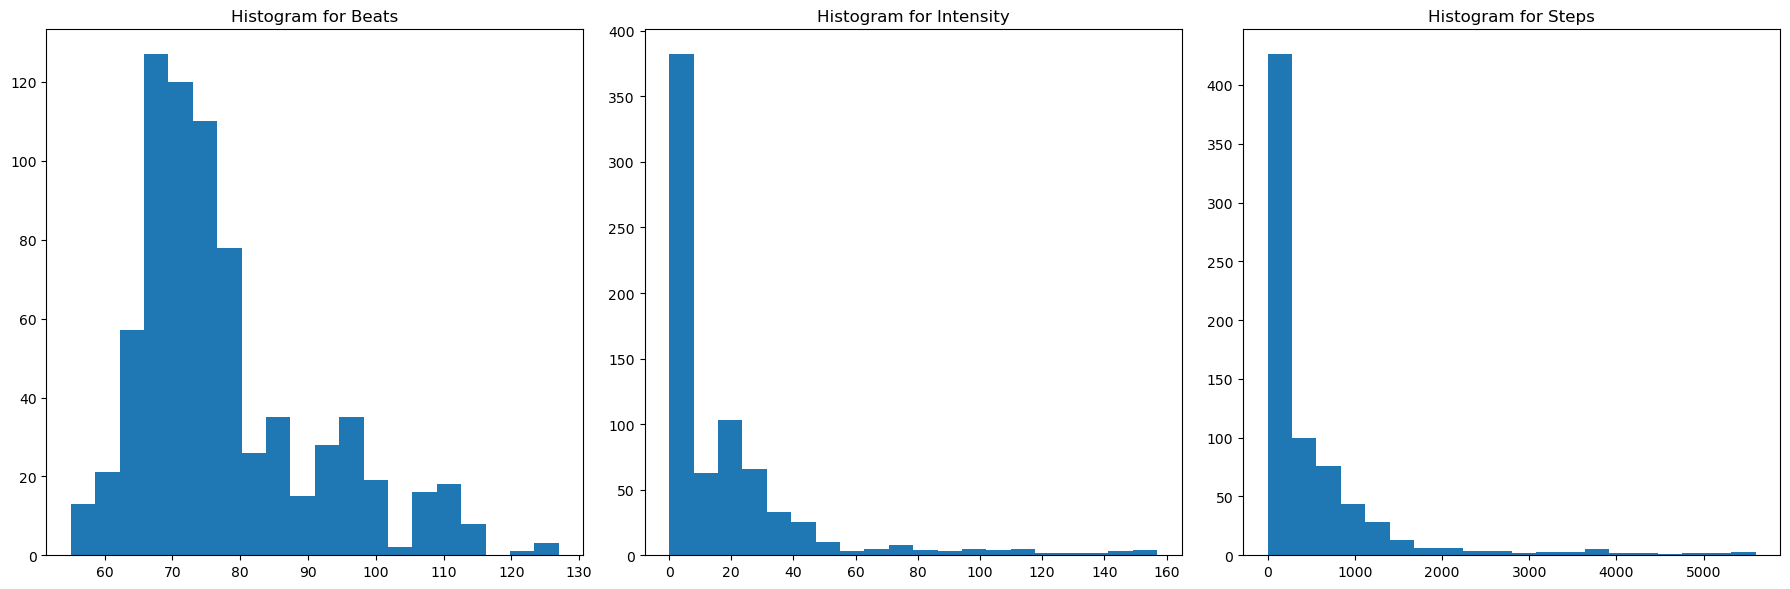

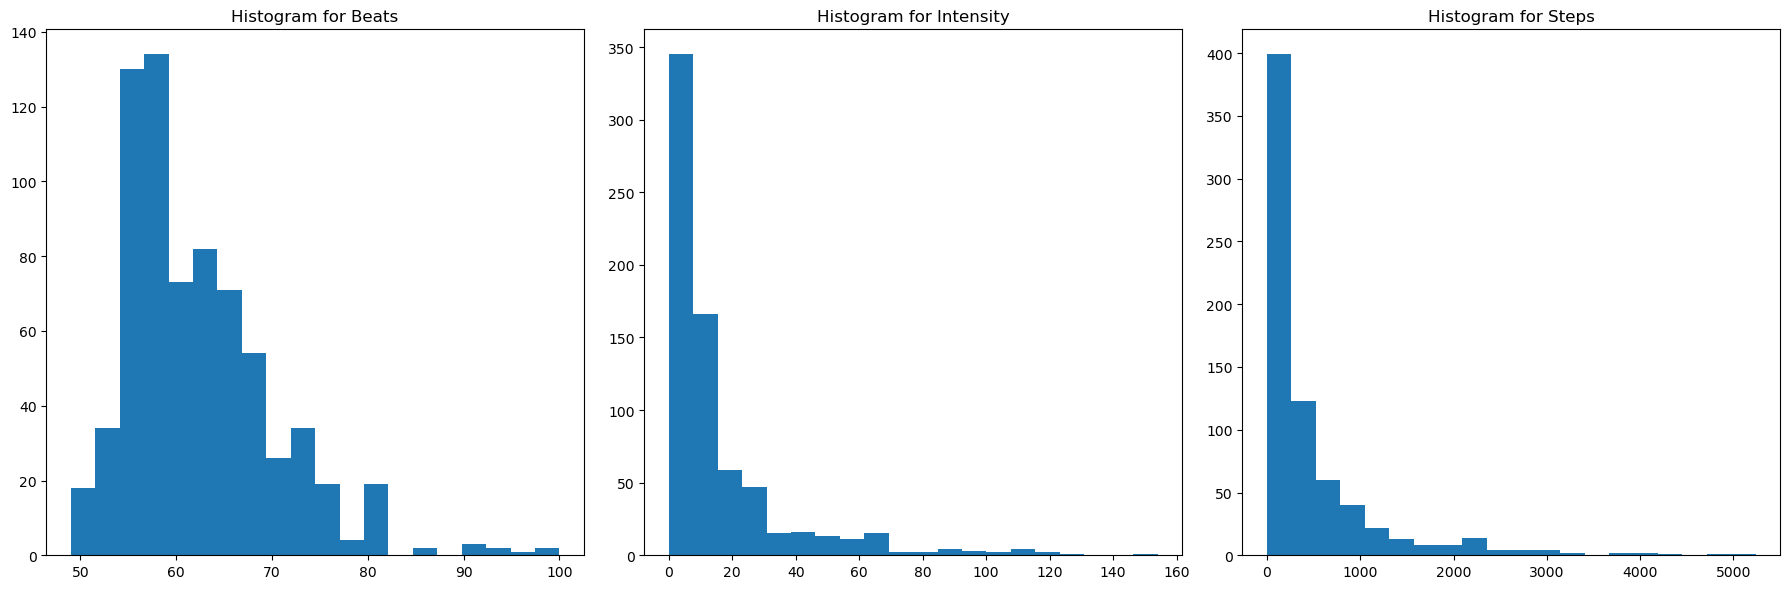

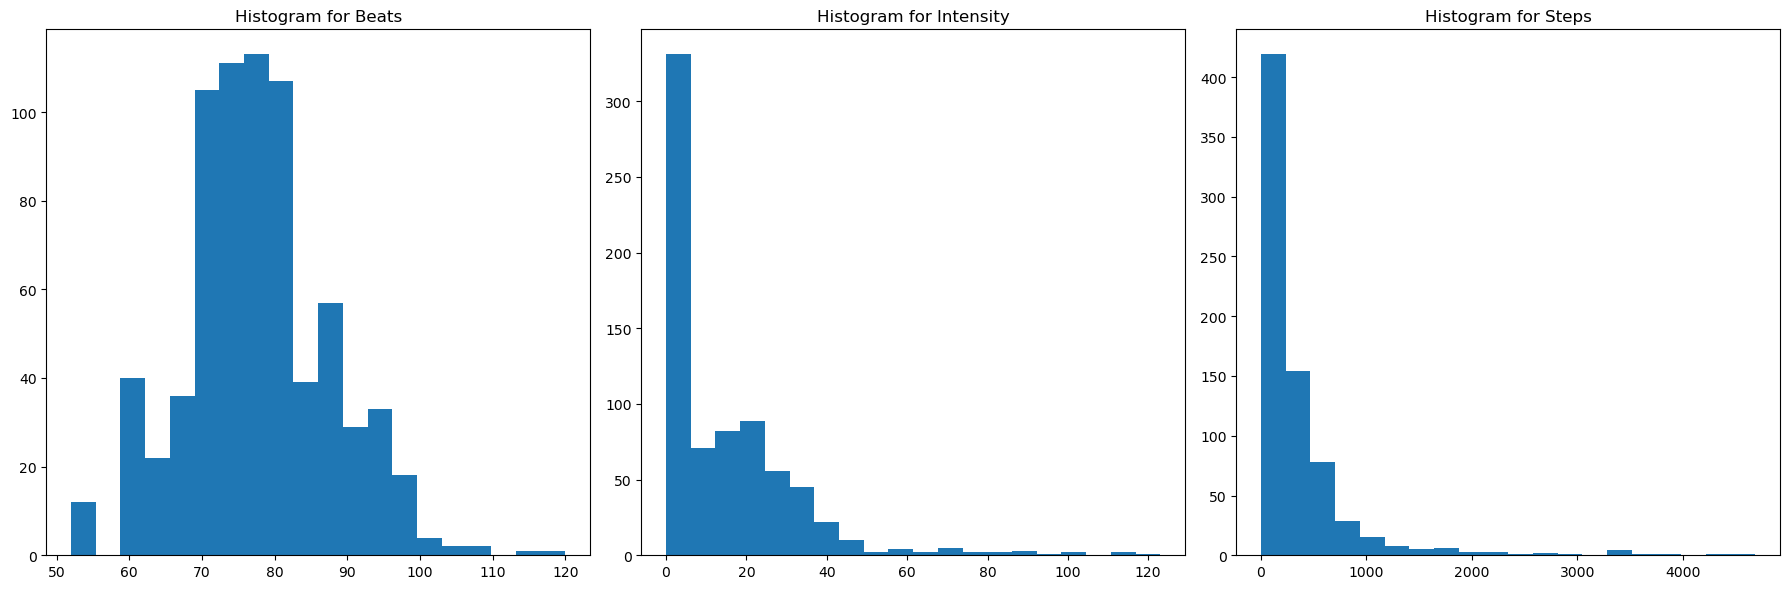

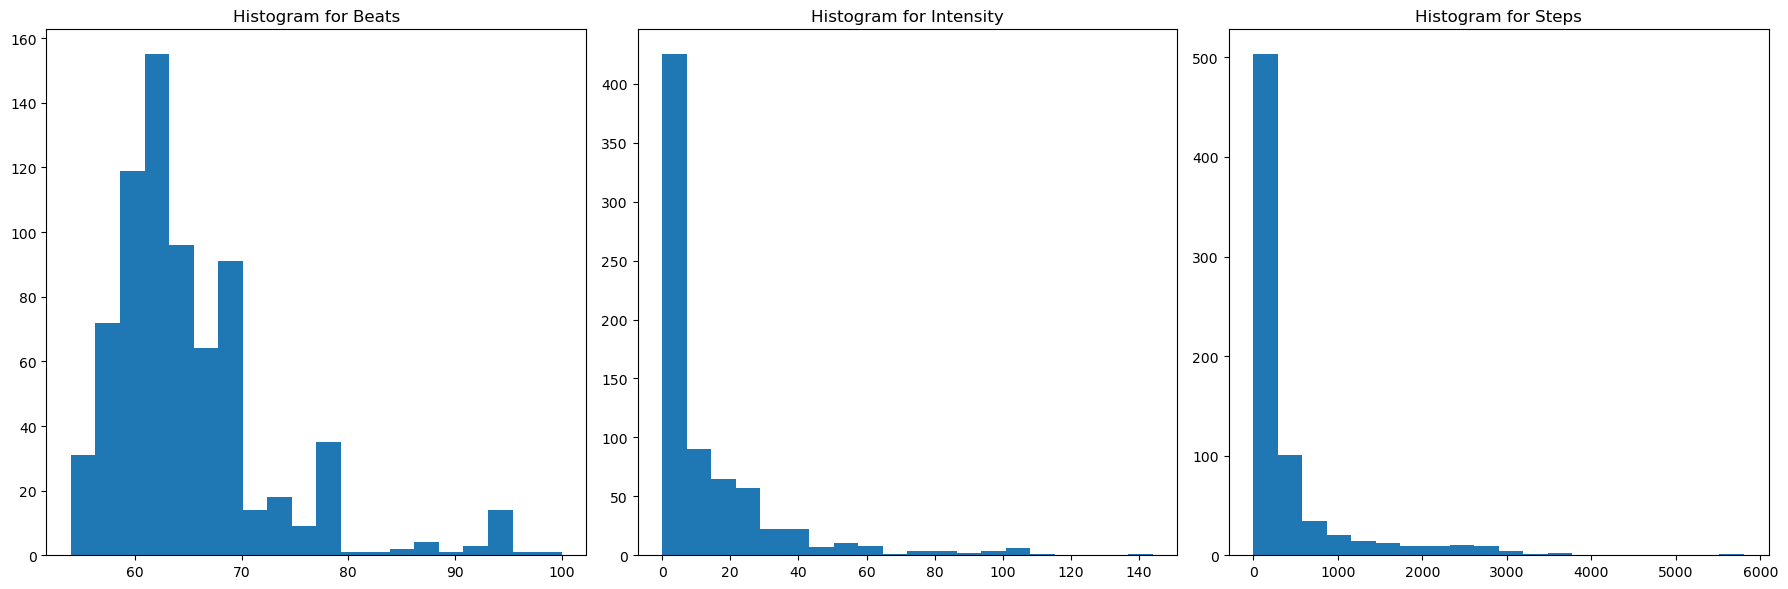

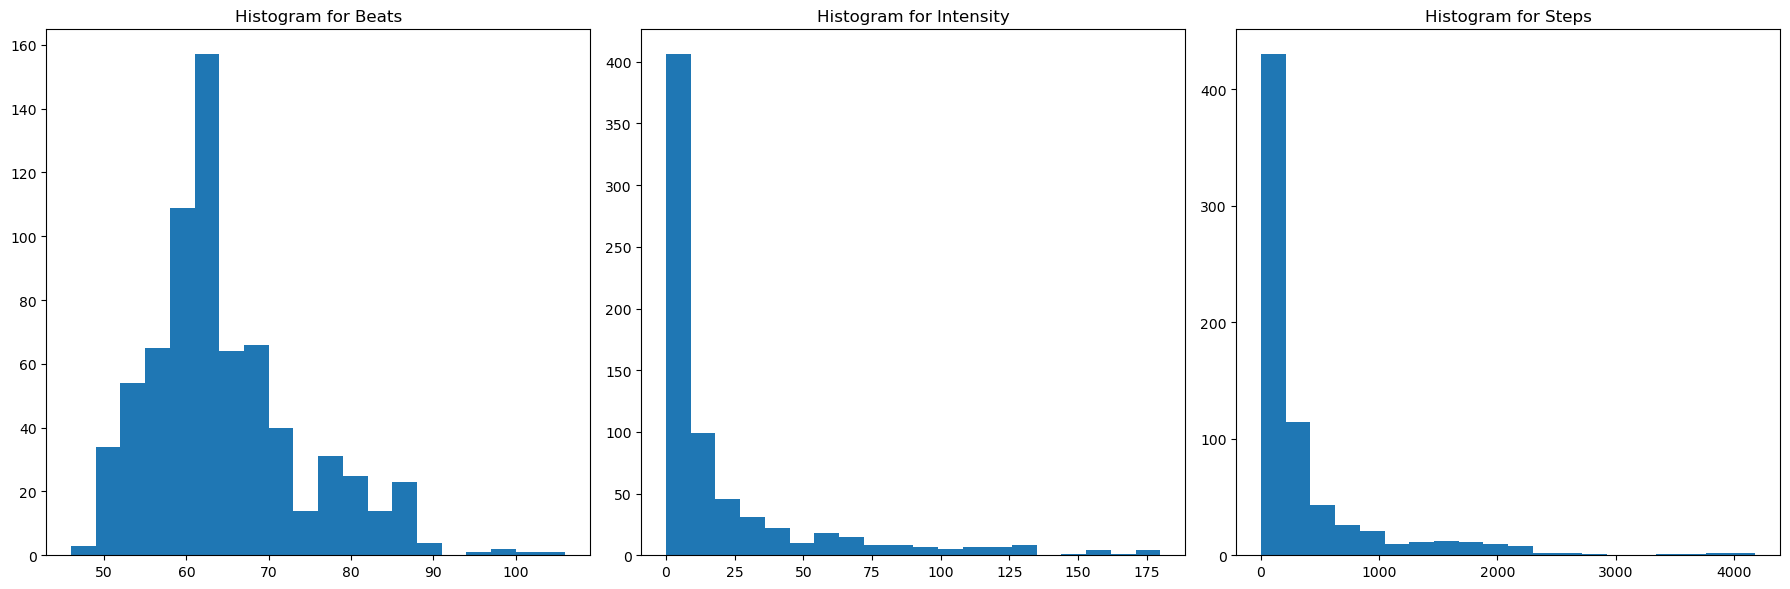

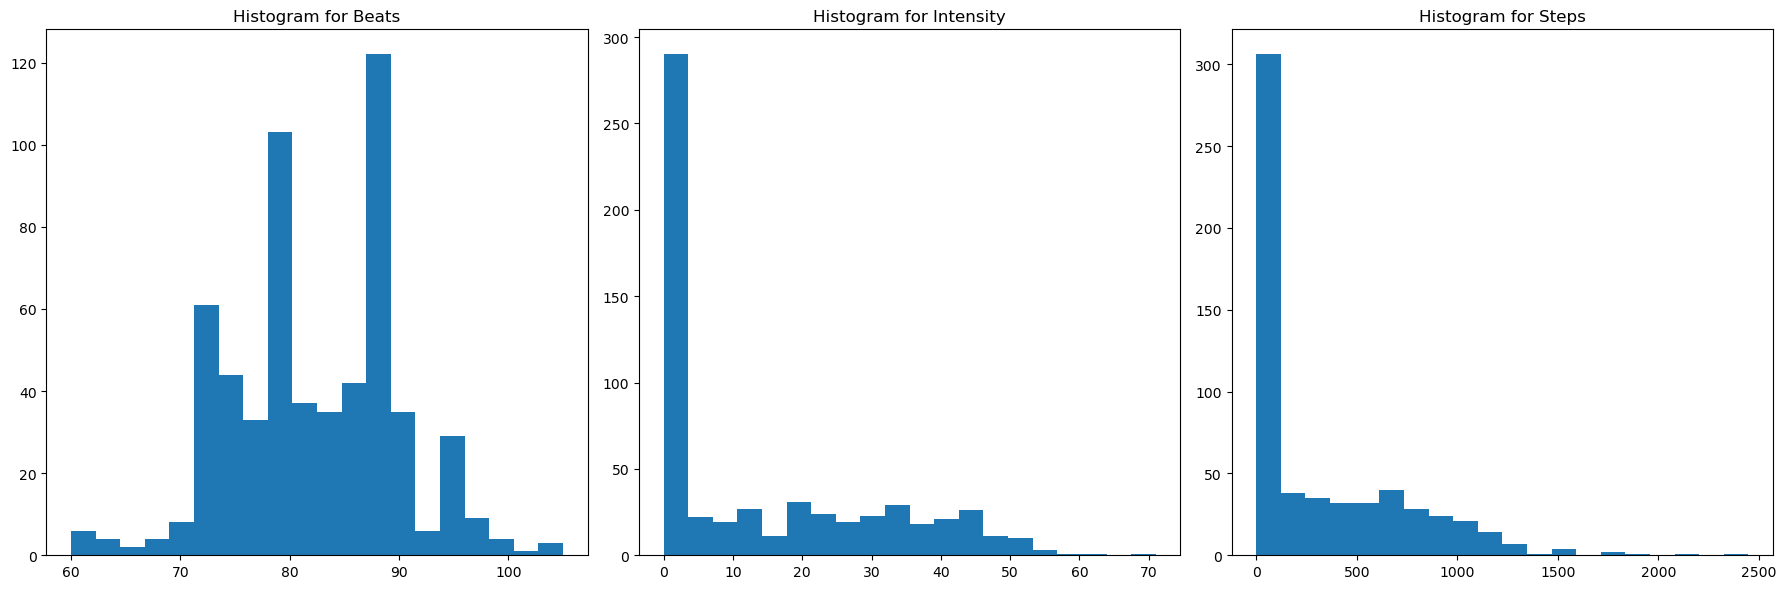

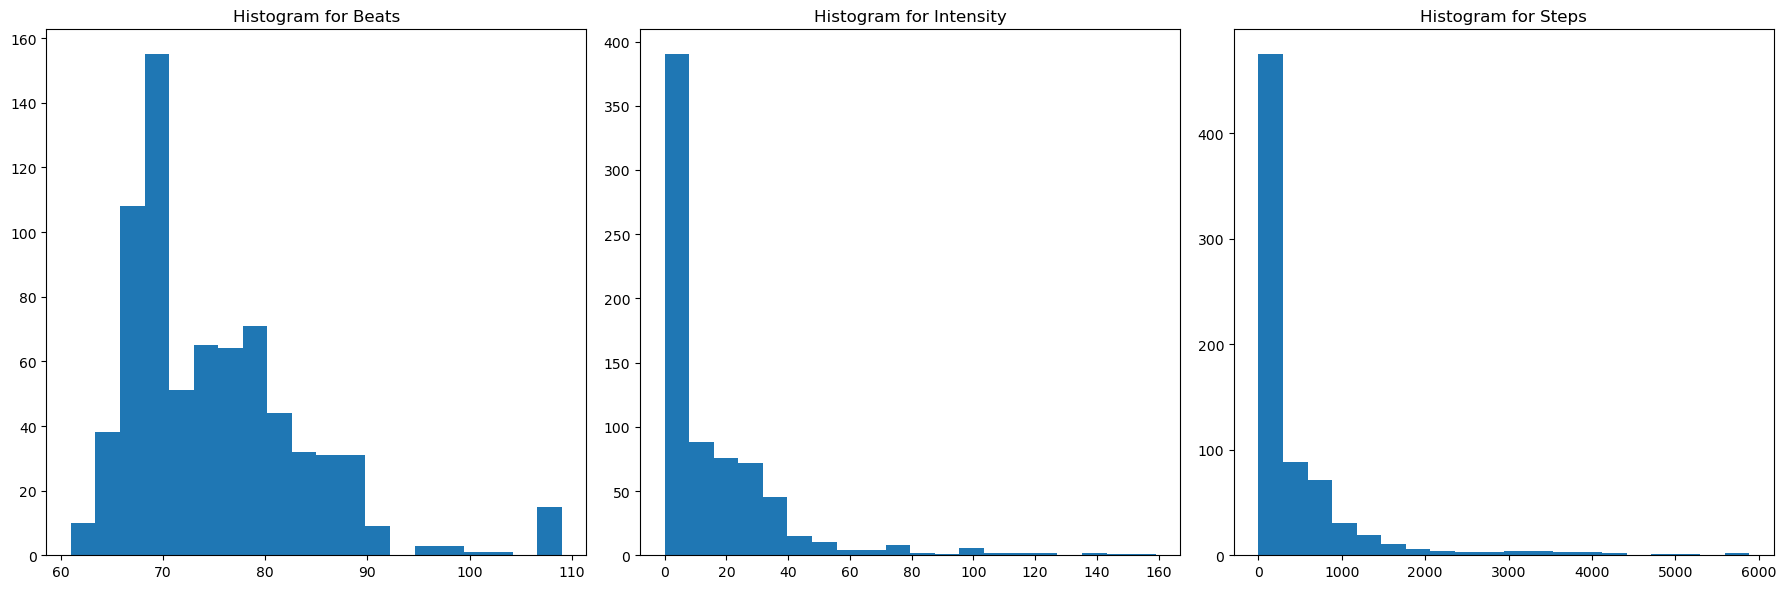

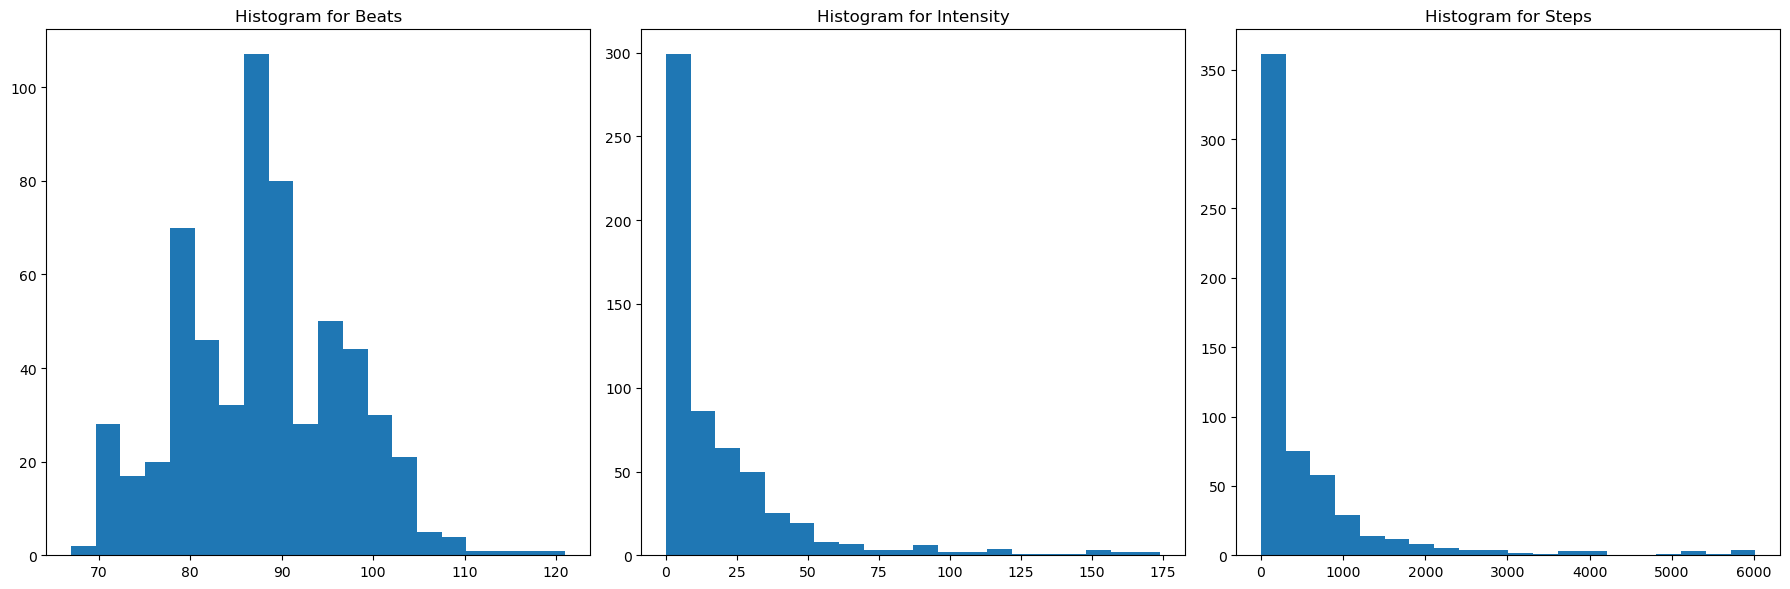

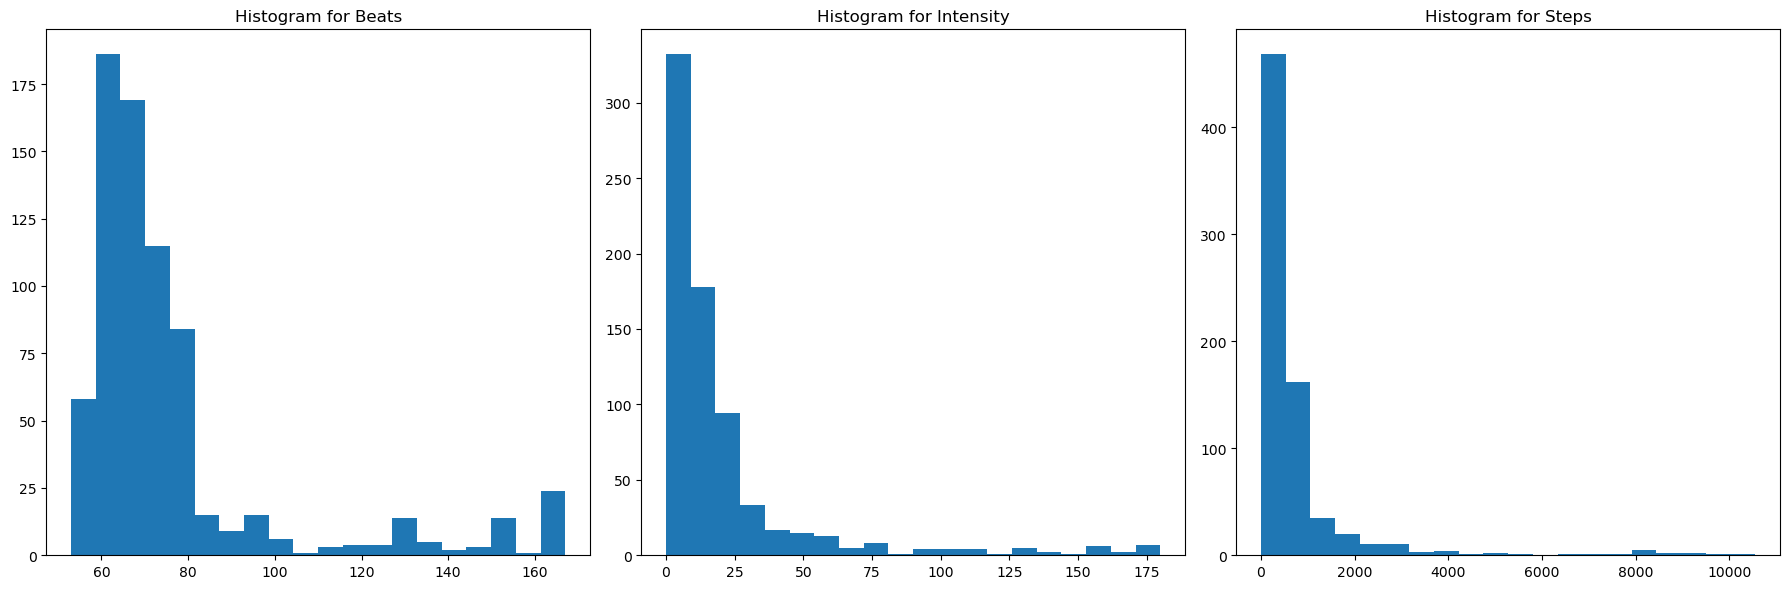

In [10]:
for user in user_ids:
    plot_histograms(data_by_users[user])

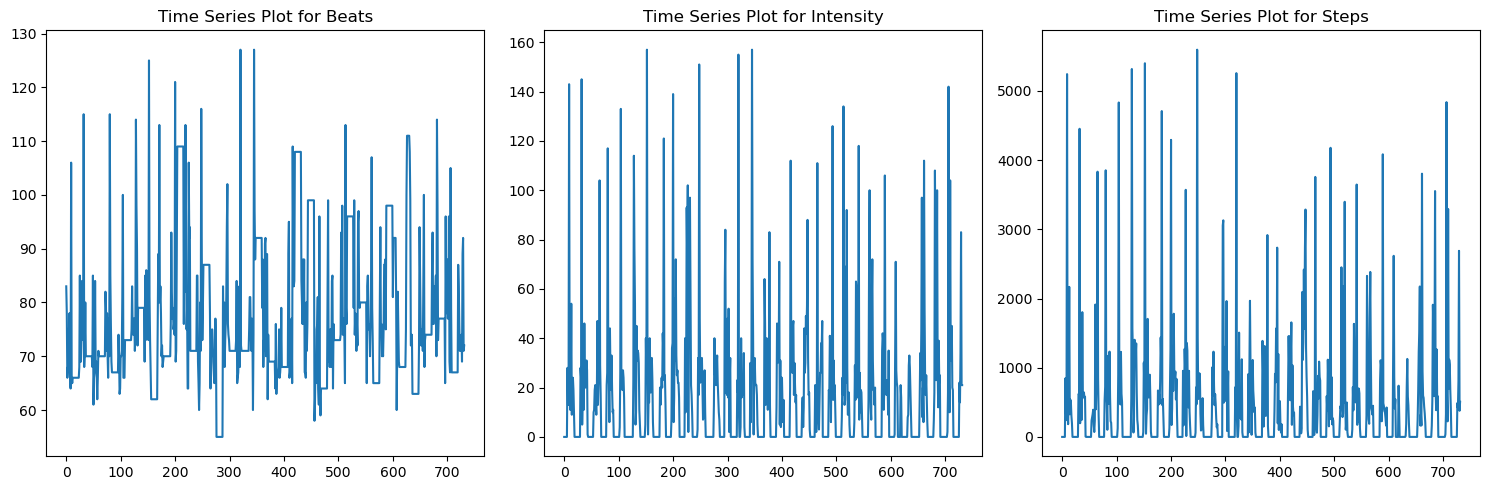

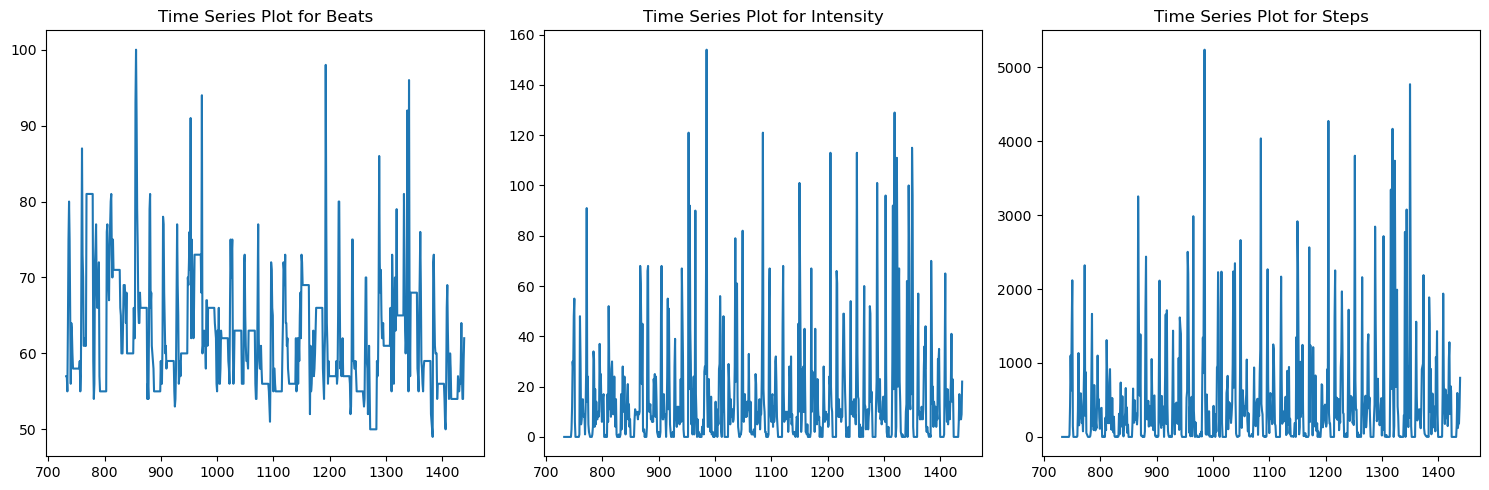

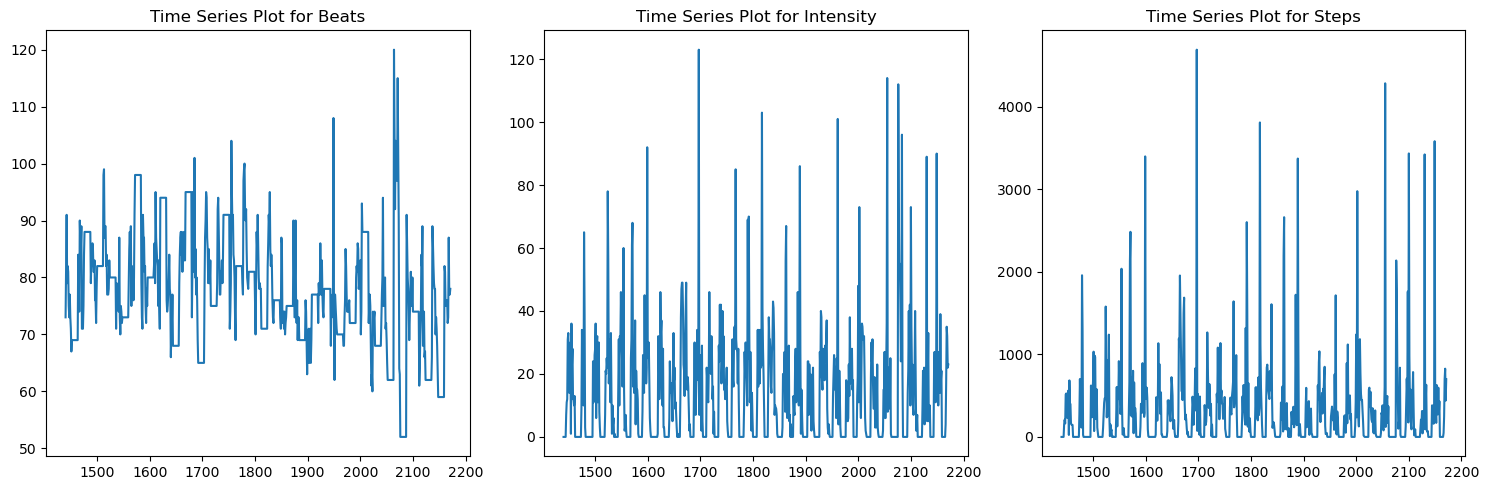

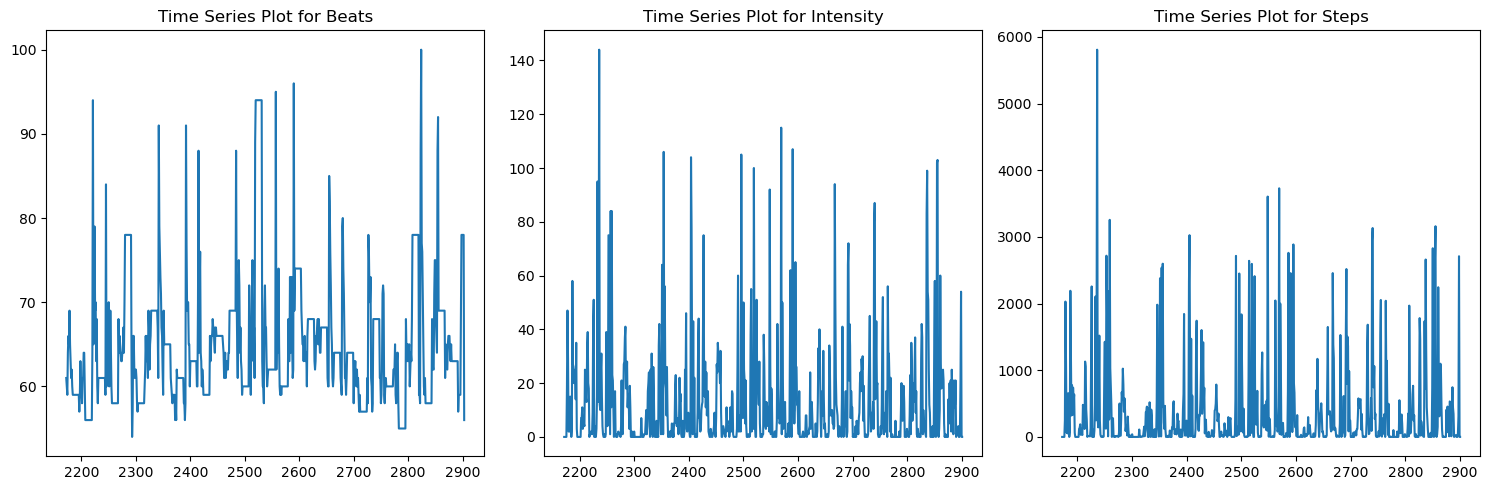

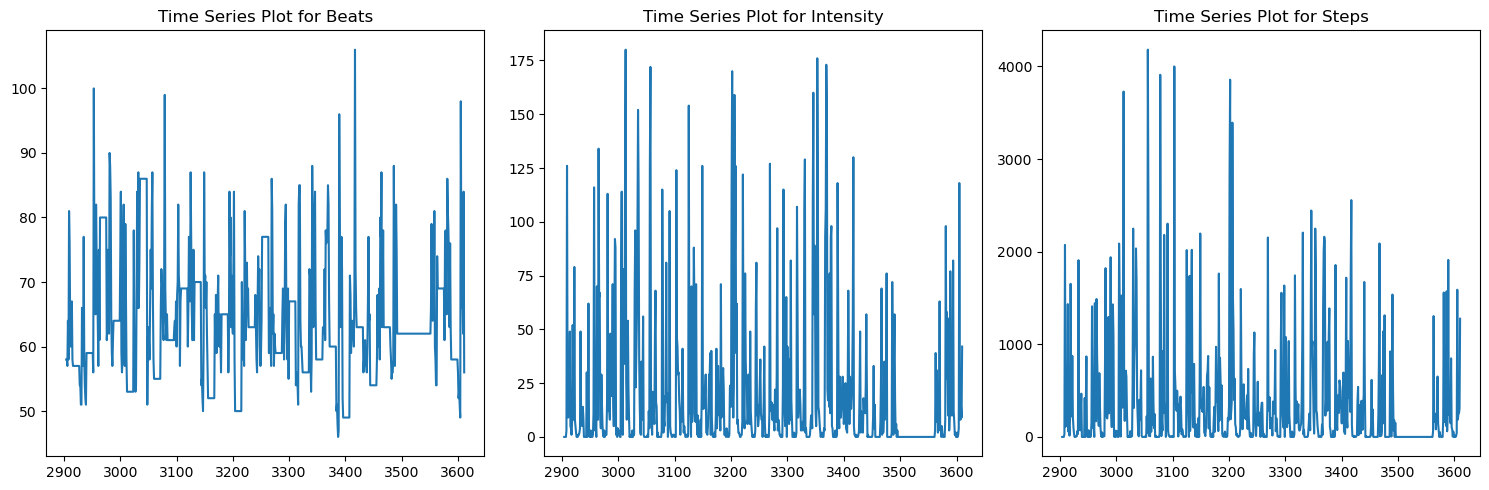

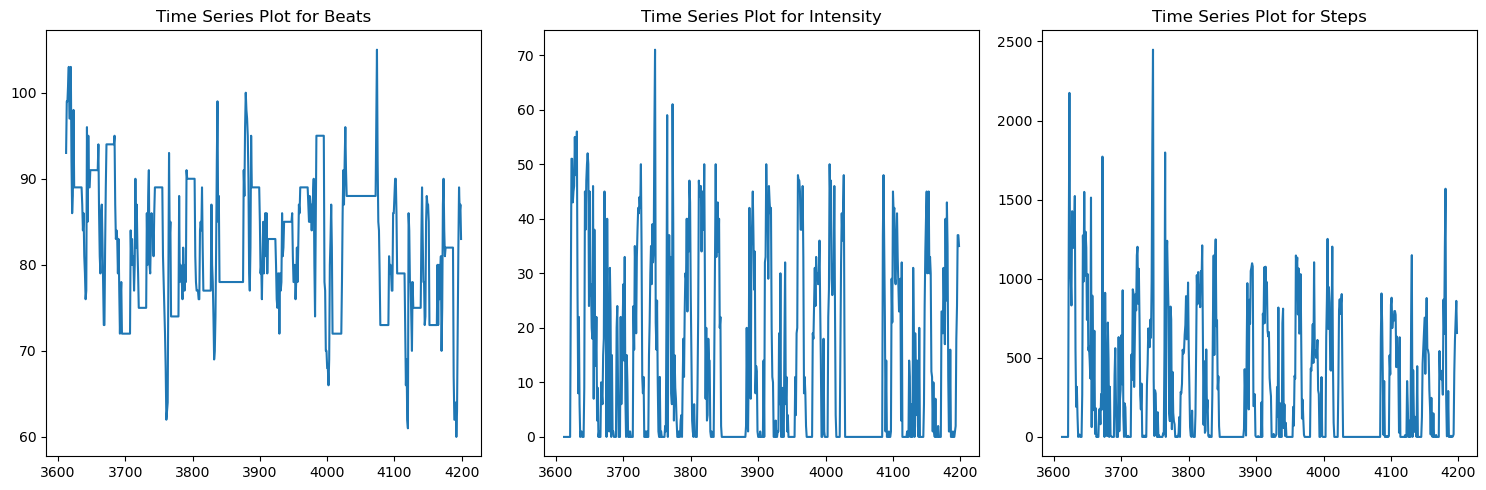

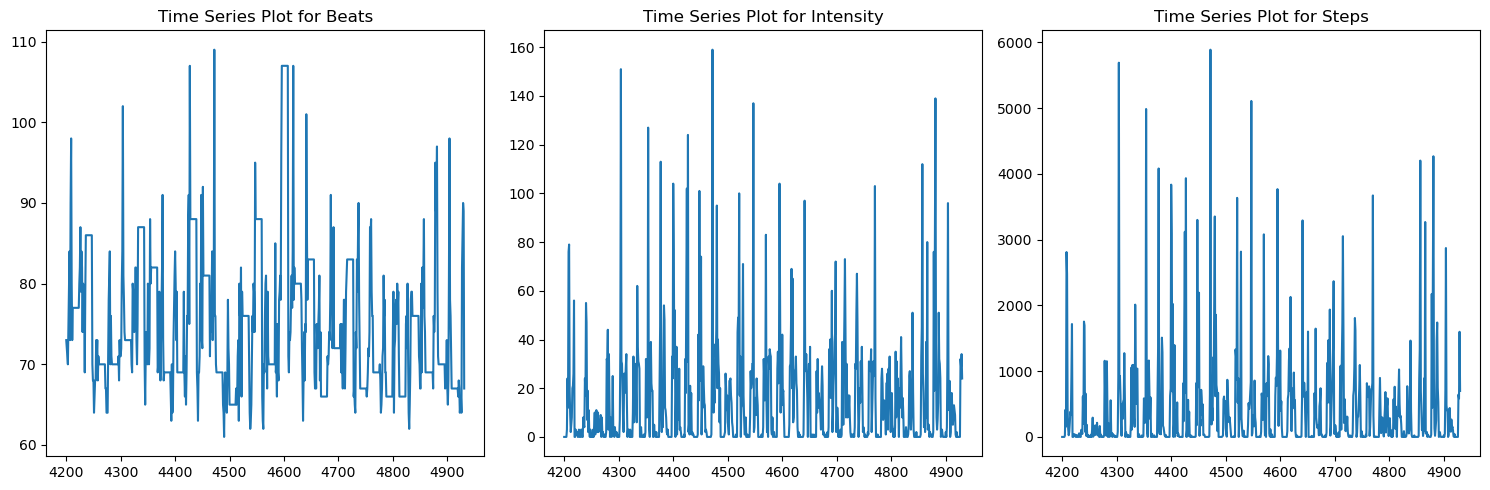

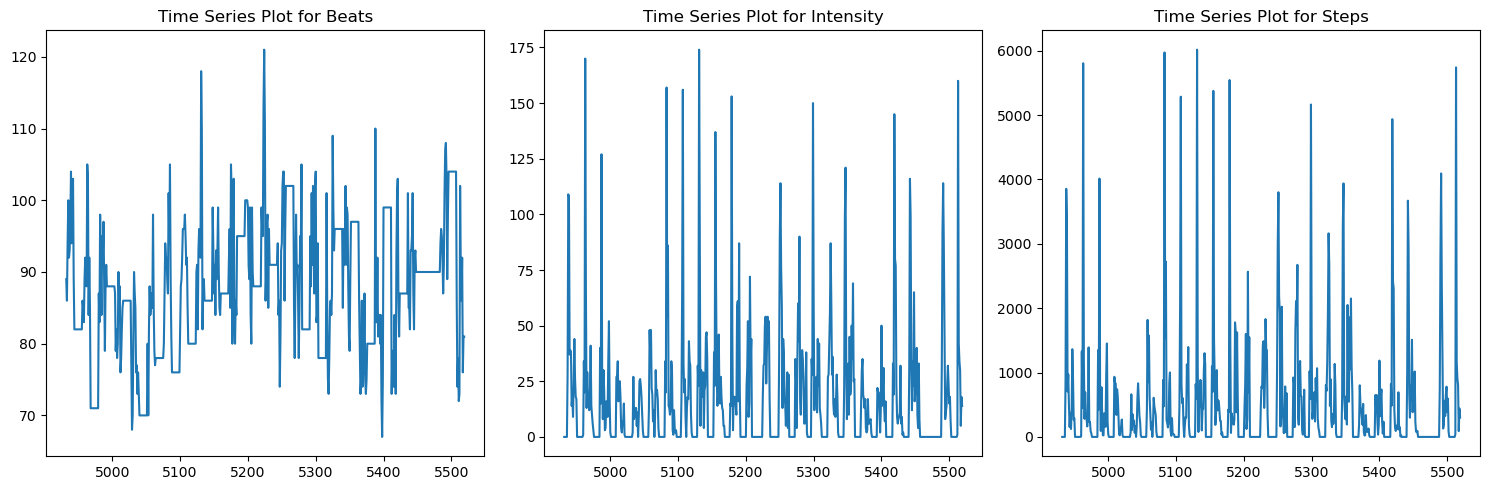

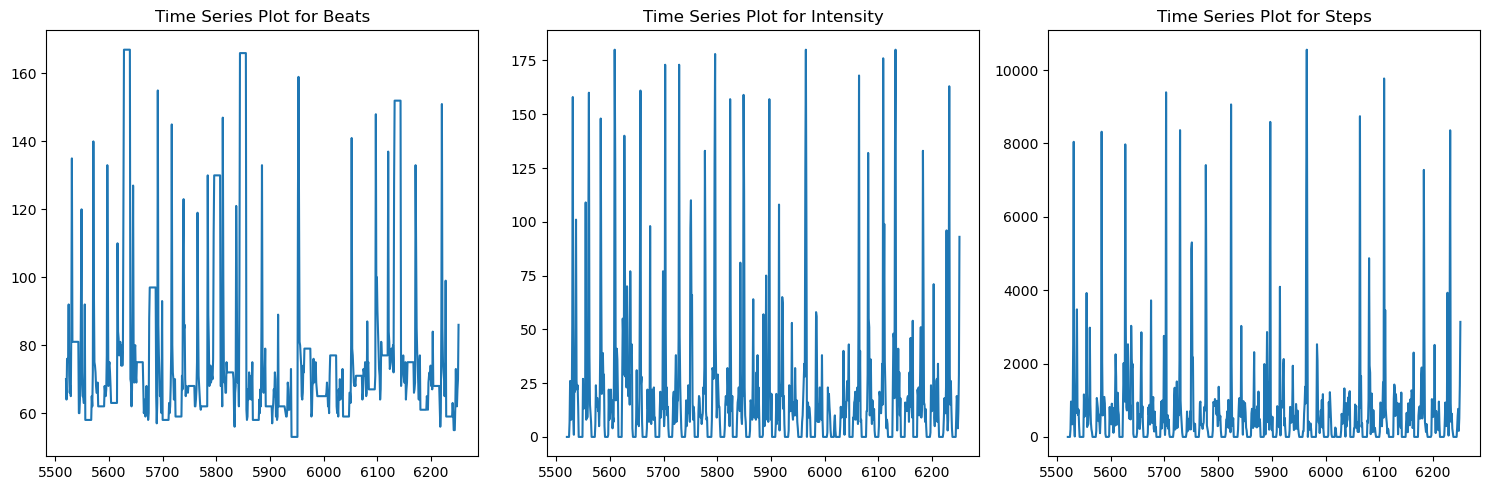

In [11]:
for user in user_ids:
    plot_time_series_plot(data_by_users[user])

The day/night alteration is seen. For some users recording periods are missing. Some users show increased activity for 200 hours, which could be physical work or traveling. Beats has an offset from 0, while other features drop to 0 during night time.

In [12]:
df.isnull().sum()

time         0
Beats        0
Id           0
Intensity    6
Steps        6
dtype: int64

Because we have Time Series, use interpolation between closest points.
https://pandas.pydata.org/docs/user_guide/missing_data.html#interpolation

In [13]:
df1 = df.interpolate()
df1.isnull().sum()

time         0
Beats        0
Id           0
Intensity    0
Steps        0
dtype: int64

In [14]:
df1.describe()

,Beats,Id,Intensity,Steps
count,6252.000000,6.252000e+03,6252.000000,6252.000000
mean,73.845170,5.638328e+09,16.093810,431.213292
std,14.799422,1.864900e+09,25.181473,811.631310
min,46.000000,2.022484e+09,0.000000,0.000000
25%,63.000000,4.558610e+09,0.000000,0.000000
50%,71.000000,5.577150e+09,7.000000,130.000000
75%,81.000000,6.962181e+09,22.000000,542.000000
max,167.000000,8.877689e+09,180.000000,10554.000000


In [15]:
for user in user_ids:
    print(user)
    print(df1[df1["Id"]==user].describe())
    print()

2022484408
            Beats            Id   Intensity        Steps
count  732.000000  7.320000e+02  732.000000   732.000000
mean    77.386612  2.022484e+09   16.987705   476.321038
std     13.303342  0.000000e+00   27.198689   862.577643
min     55.000000  2.022484e+09    0.000000     0.000000
25%     68.000000  2.022484e+09    0.000000     0.000000
50%     73.000000  2.022484e+09    5.000000    96.500000
75%     83.000000  2.022484e+09   24.000000   619.500000
max    127.000000  2.022484e+09  157.000000  5596.000000

4388161847
            Beats            Id   Intensity        Steps
count  708.000000  7.080000e+02  708.000000   708.000000
mean    62.384181  4.388162e+09   14.826271   450.742938
std      7.800510  0.000000e+00   21.684168   711.516401
min     49.000000  4.388162e+09    0.000000     0.000000
25%     56.000000  4.388162e+09    1.000000     7.000000
50%     60.000000  4.388162e+09    8.000000   193.000000
75%     66.000000  4.388162e+09   17.000000   545.500000
max    1

For users 700.. and 887.. we see that 700 has less average steps (497 vs 676), but more beats (87 vs 76). Similar can be seen for other users.

In [16]:
train_size = 0.7
n_objects = df.shape[0]
train_samples = int(n_objects * train_size)

# no shuffle
X_train, X_val = df[:train_samples], df[train_samples:]

In [17]:
columns = ['Beats','Intensity','Steps']
# Initialize the scaler
scaler = MinMaxScaler()
# Fit and transform the dataset
X_train1 = pd.DataFrame(scaler.fit_transform (X_train[columns]), columns=columns)

In [18]:
X_val1 = pd.DataFrame(scaler.fit_transform (X_val[columns]), columns=columns)

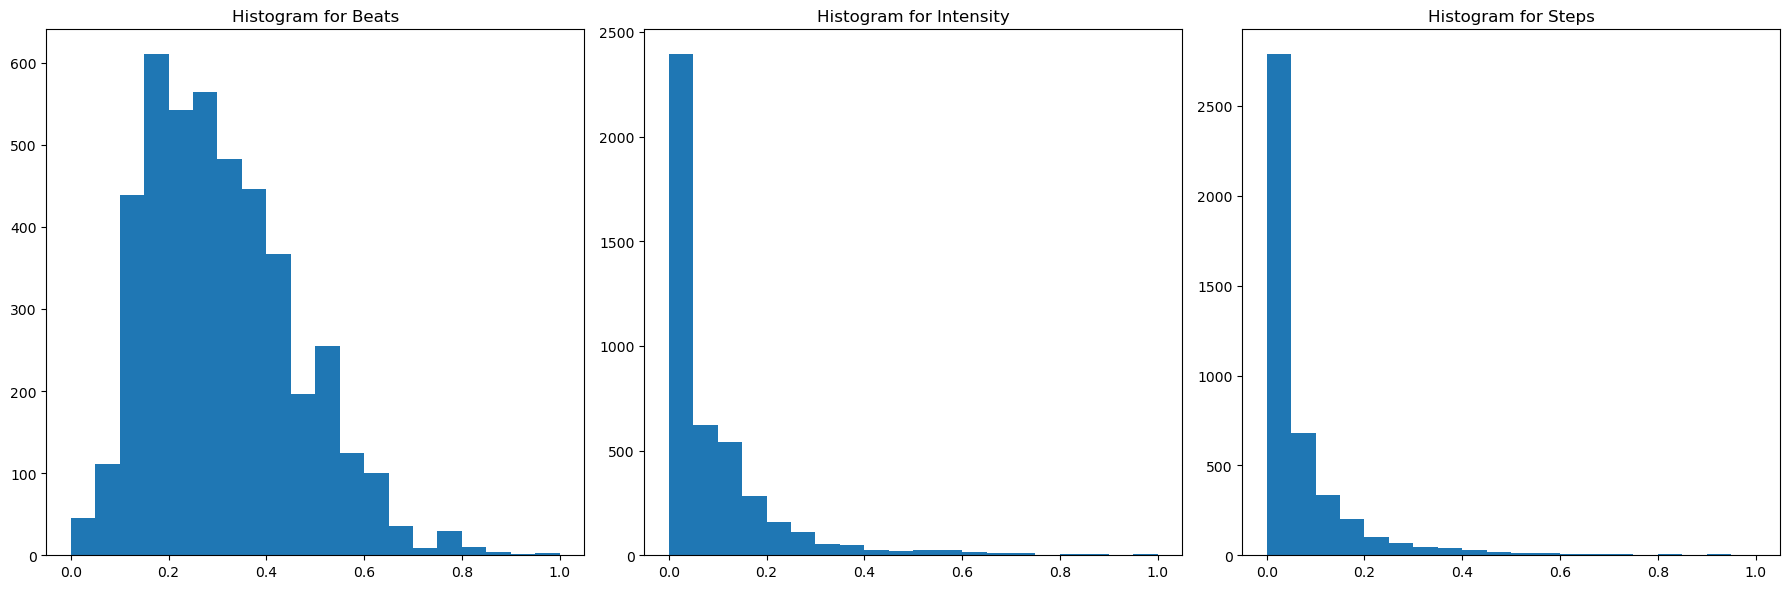

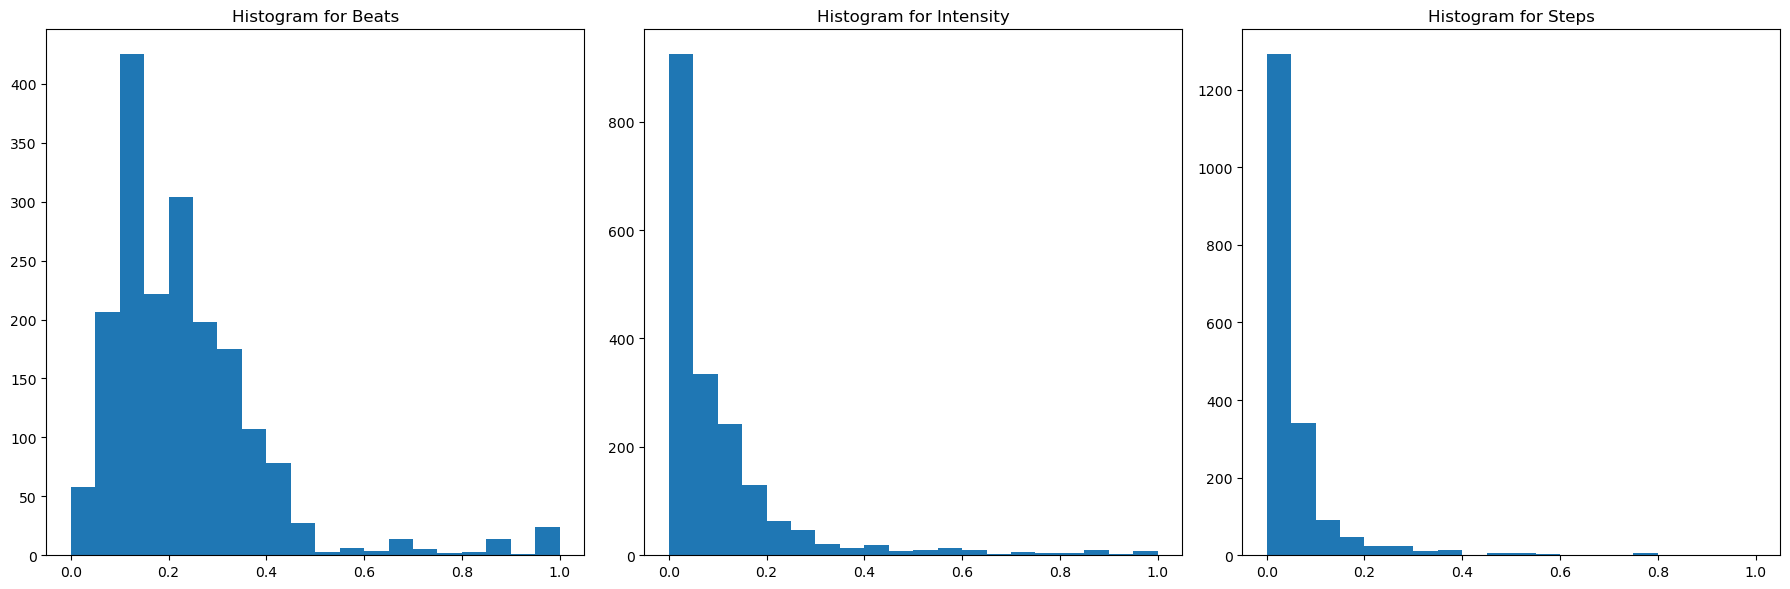

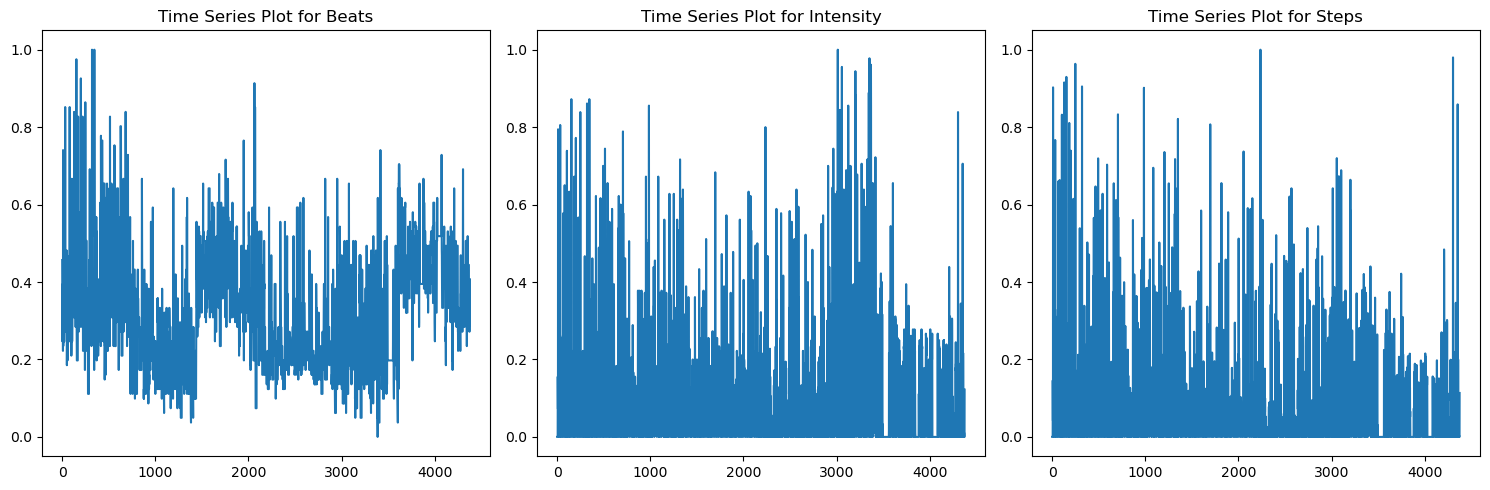

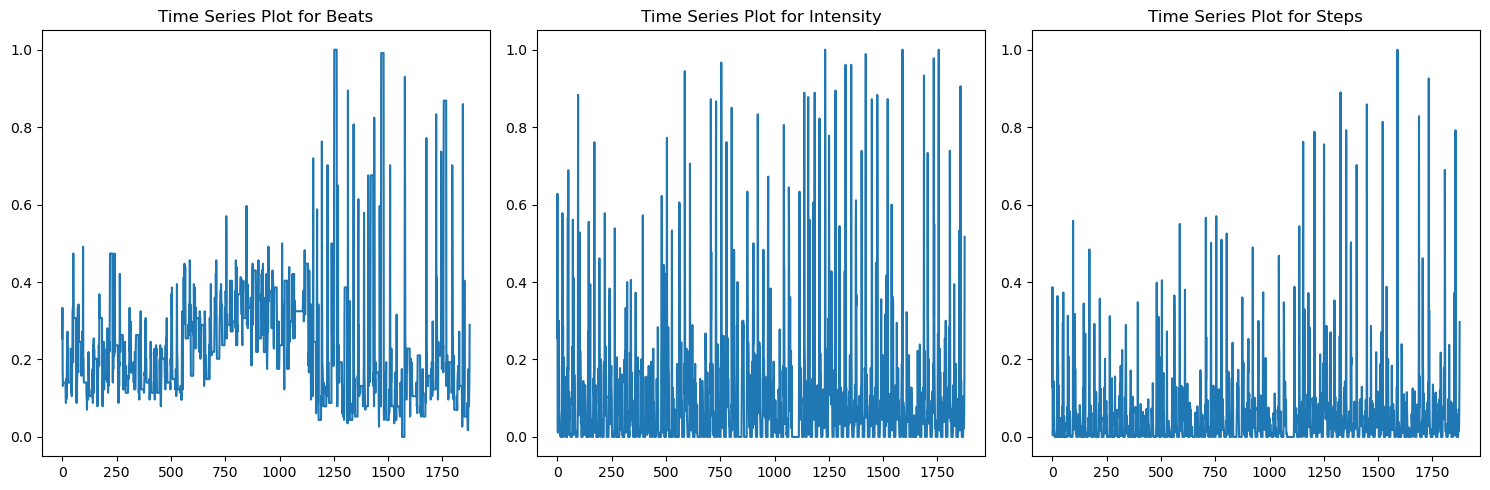

In [19]:
from utils_heart import plot_histograms, plot_time_series_plot

plot_histograms(X_train1)
plot_histograms(X_val1)

plot_time_series_plot(X_train1)
plot_time_series_plot(X_val1)